In [1]:
import sys
sys.path.append('../../safepy')

# Import safepy package
from safepy import safe

%matplotlib inline

In [2]:
# Parameters

## Path to the cloned safe-data repository (https://github.com/baryshnikova-lab/safe-data.git)
path_to_safe_data = '../../safe-data/' 

# Example 1 -- Annotating the genetic interaction similarity network

In this example, SAFE is run with all the default settings:
* the network is the genetic interaction similarity network from Costanzo et al., 2016
* the attribute is a doxorubicin sensitivity screen from Hoepfner et al., 2014

In [3]:
## initialize the safe object
sf = safe.SAFE(path_to_safe_data=path_to_safe_data)

In [4]:
## load network
sf.load_network(network_file='networks/Costanzo_Science_2016.gpickle')

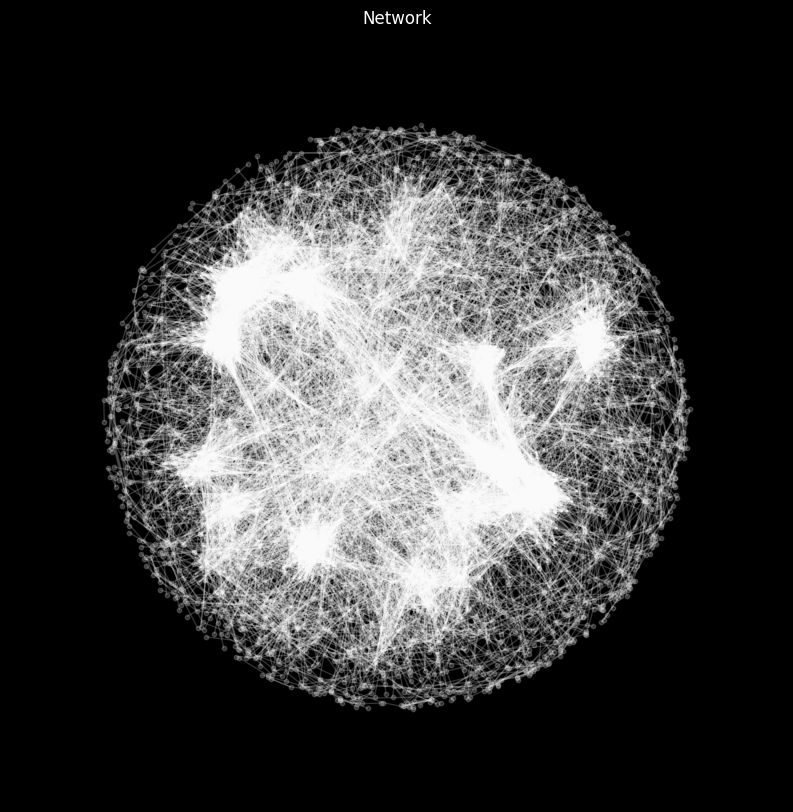

In [5]:
## plot network
ax = sf.plot_network()

In [6]:
sf.define_neighborhoods()

In [7]:
sf.load_attributes(attribute_file='attributes/hoepfner_movva_2014_doxorubucin.txt')

In [8]:
# # Alternatively to the default attribute, you can specify an attribute file to be used instead of the default settings:
# # For format specifications, check the example attribute file. The main format requirements are:
# # * the first column contains the node labels (in this case, yeast ORFs)
# # * each column is an attribute
    
# sf.load_attributes(attribute_file='hoepfner_movva_2014_doxorubucin.txt')

In [9]:
sf.compute_pvalues(num_permutations=1000)

100%|██████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.88it/s]


In [10]:
# Alternatively, run the same permutations in parallel using 8 cores on this machine
# sf.compute_pvalues(num_permutations=1000, processes=8)

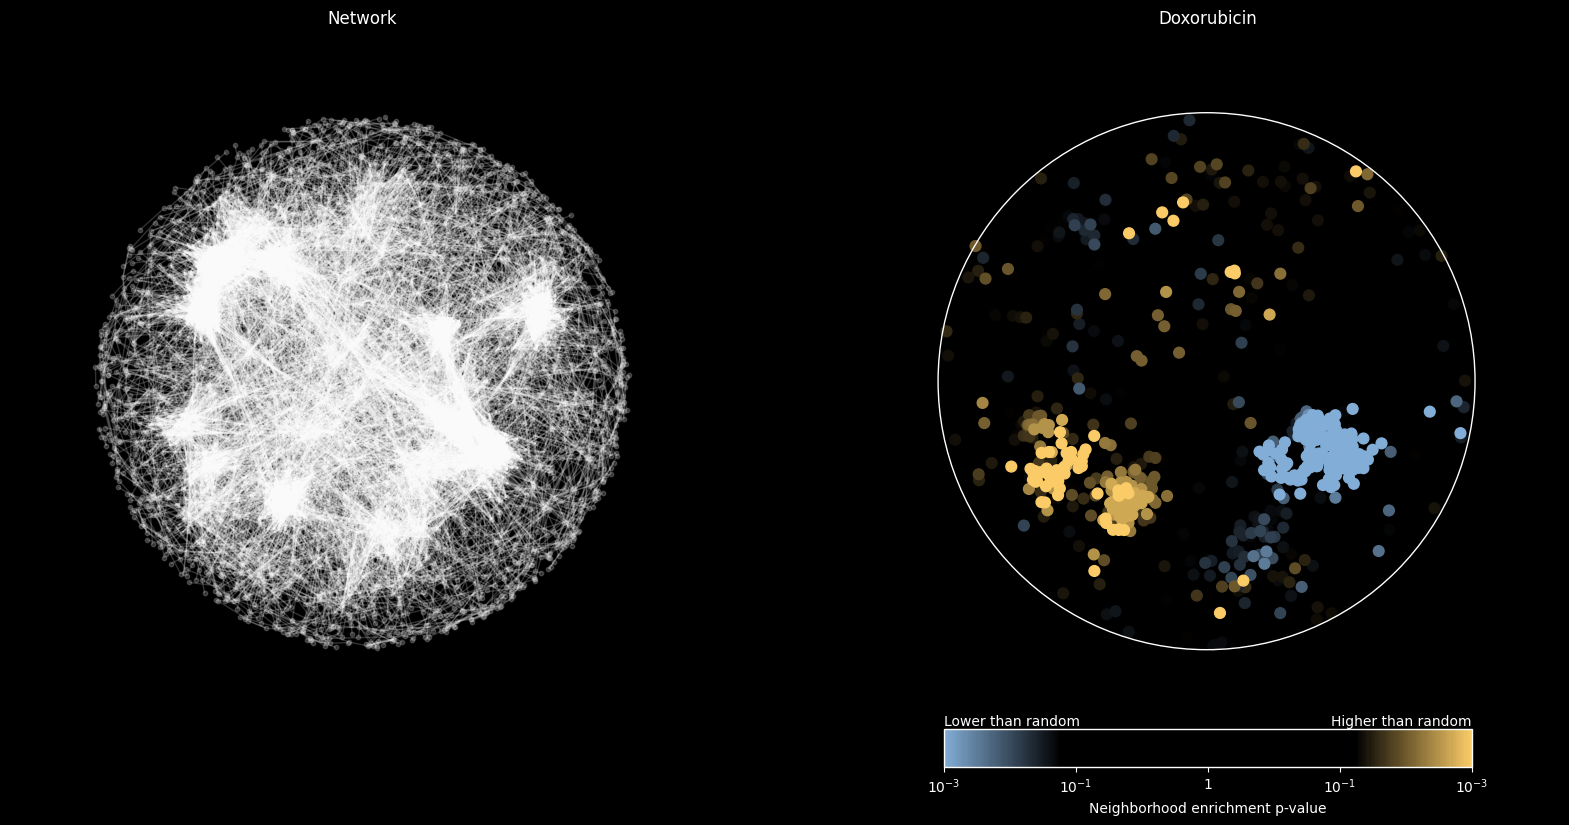

In [11]:
# Plot a random attribute
sf.plot_sample_attributes()

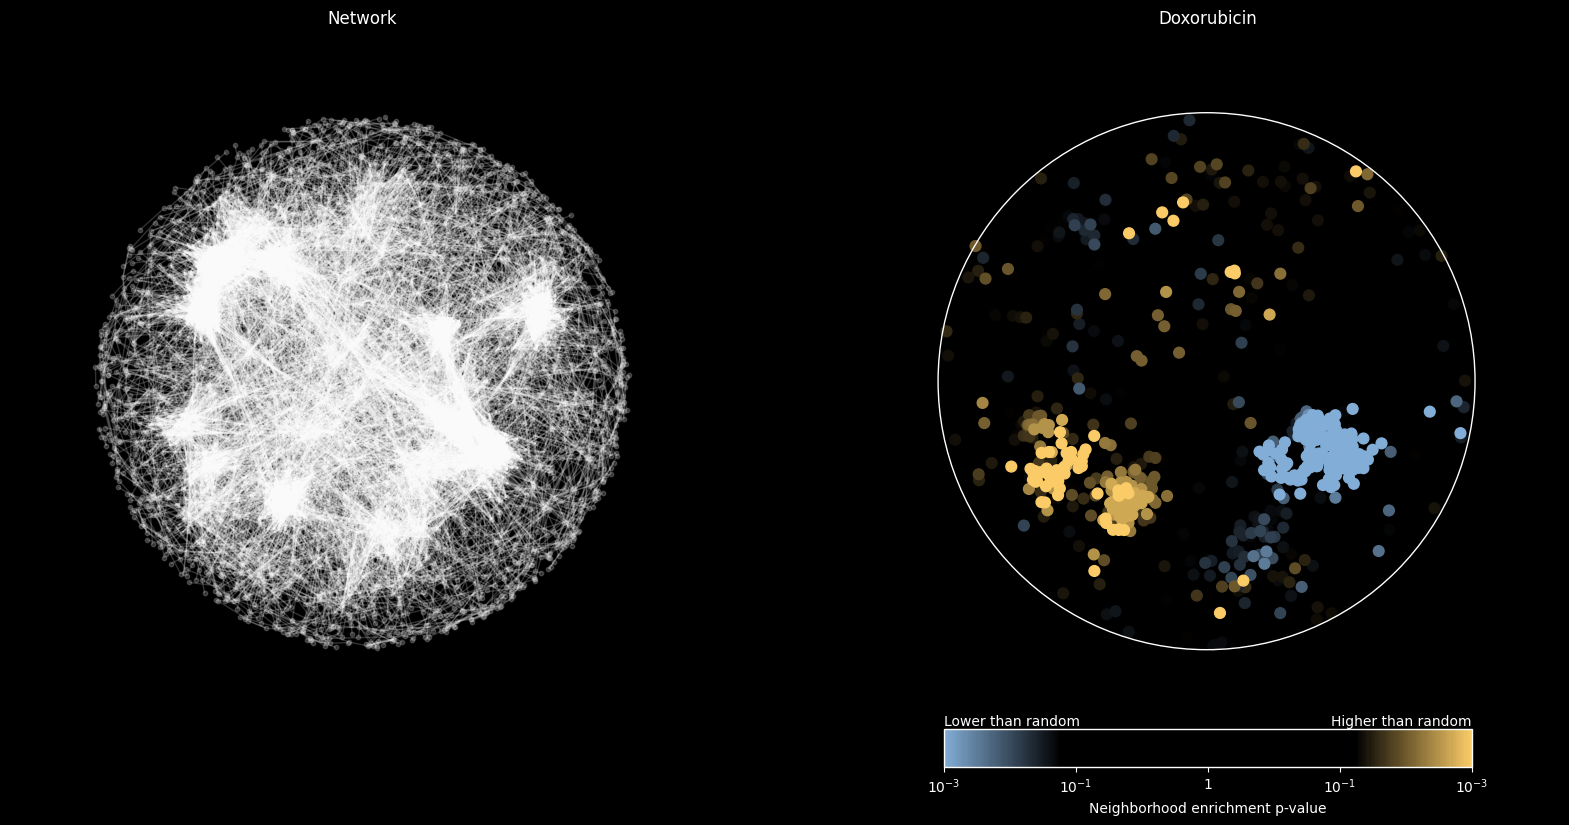

In [12]:
# Plot a specific attribute (Note: to get the list of available attributes, check sf.attributes.head())
sf.plot_sample_attributes(attributes=['Doxorubicin'])

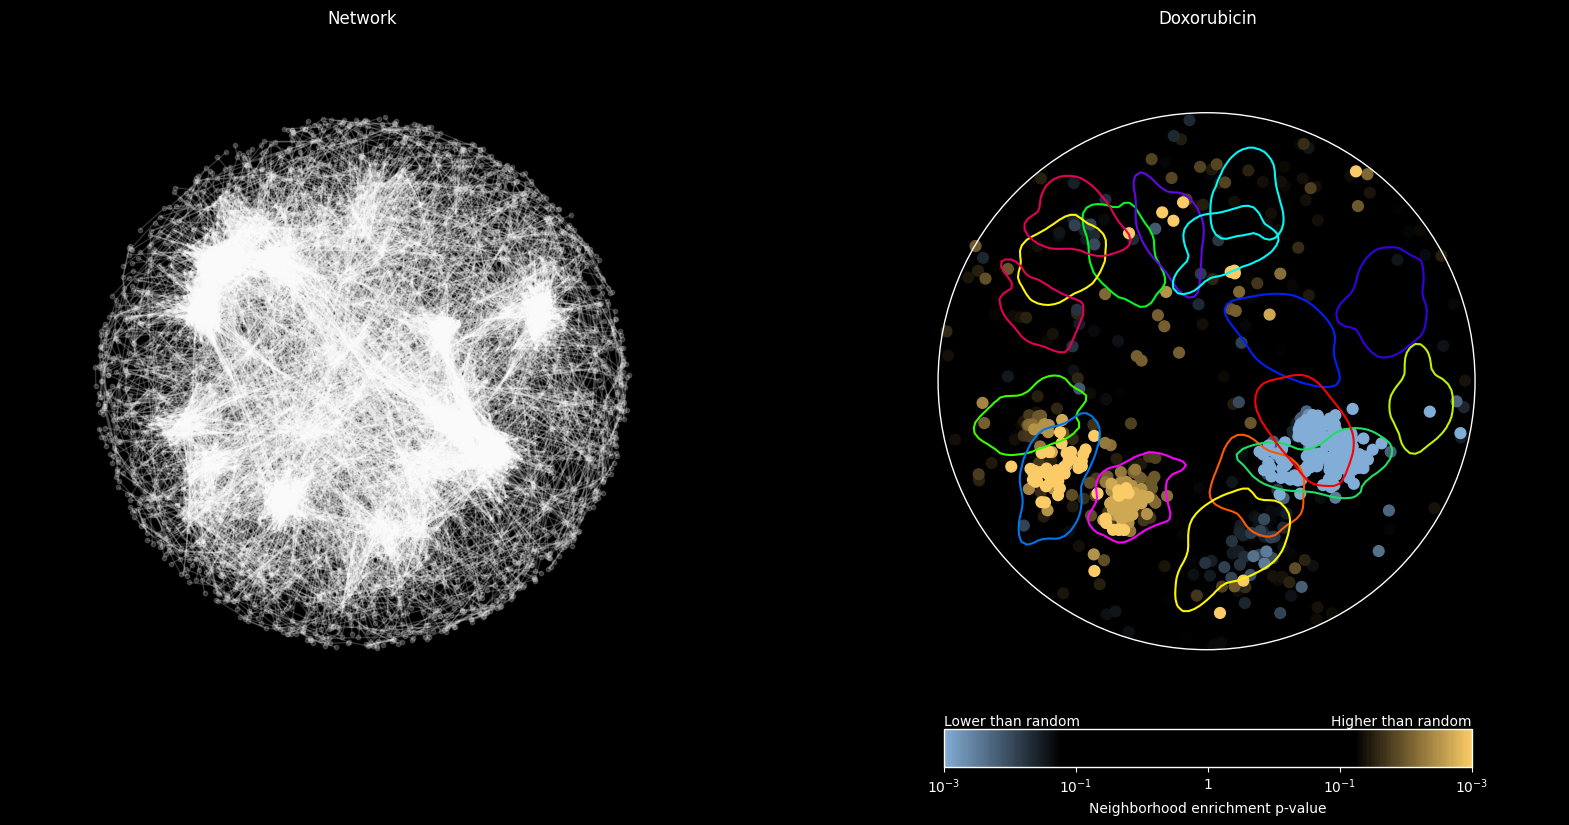

In [13]:
# Show the contours of the functional clusters from Costanzo et al., 2016
sf.plot_sample_attributes(show_costanzo2016=True)

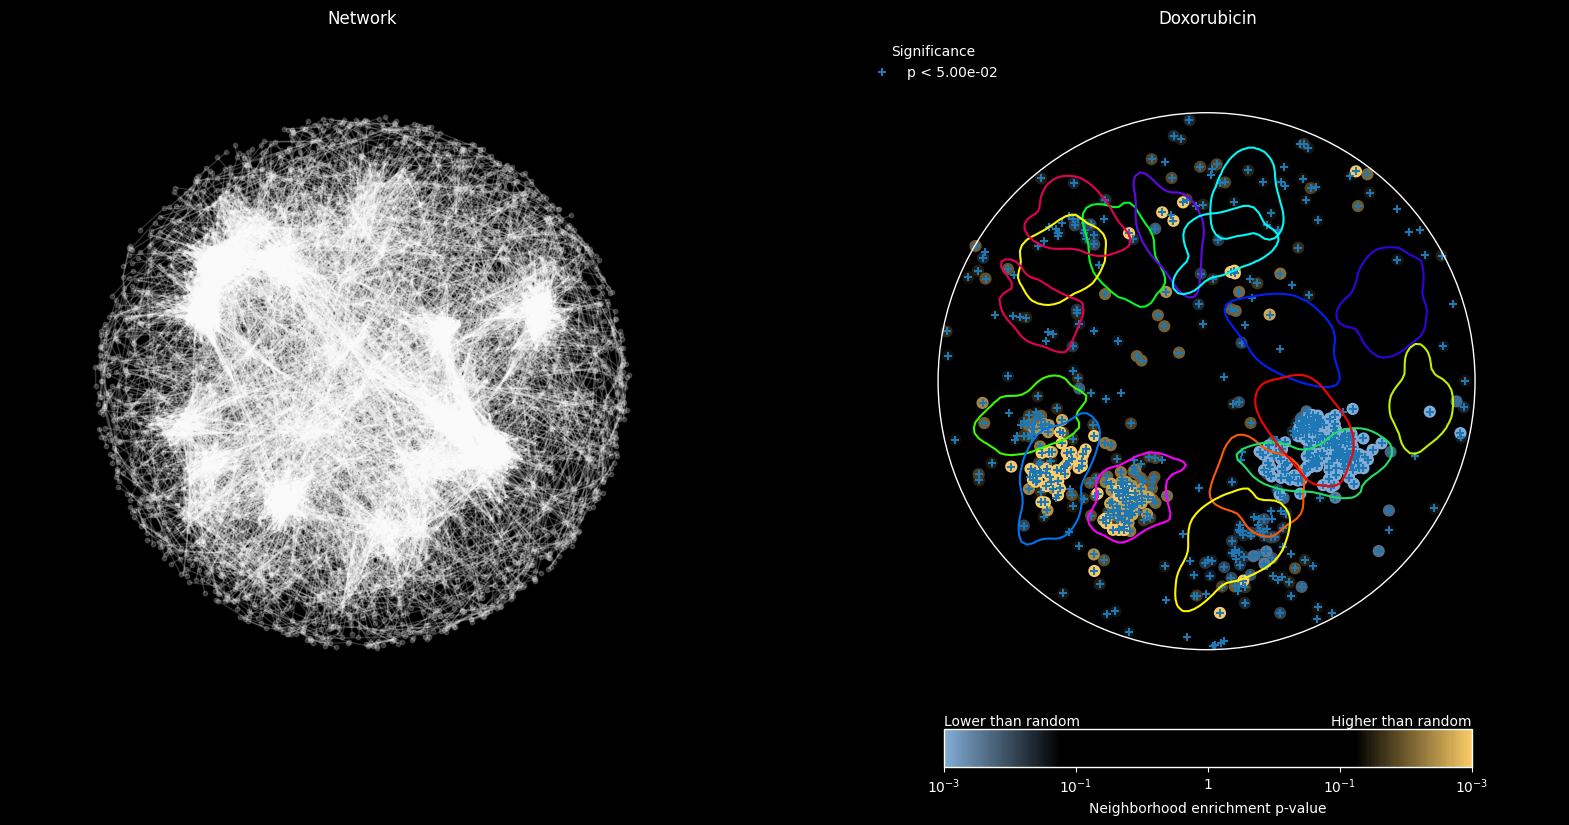

In [14]:
# Map the significant nodes
sf.plot_sample_attributes(show_costanzo2016=True, show_significant_nodes=True)

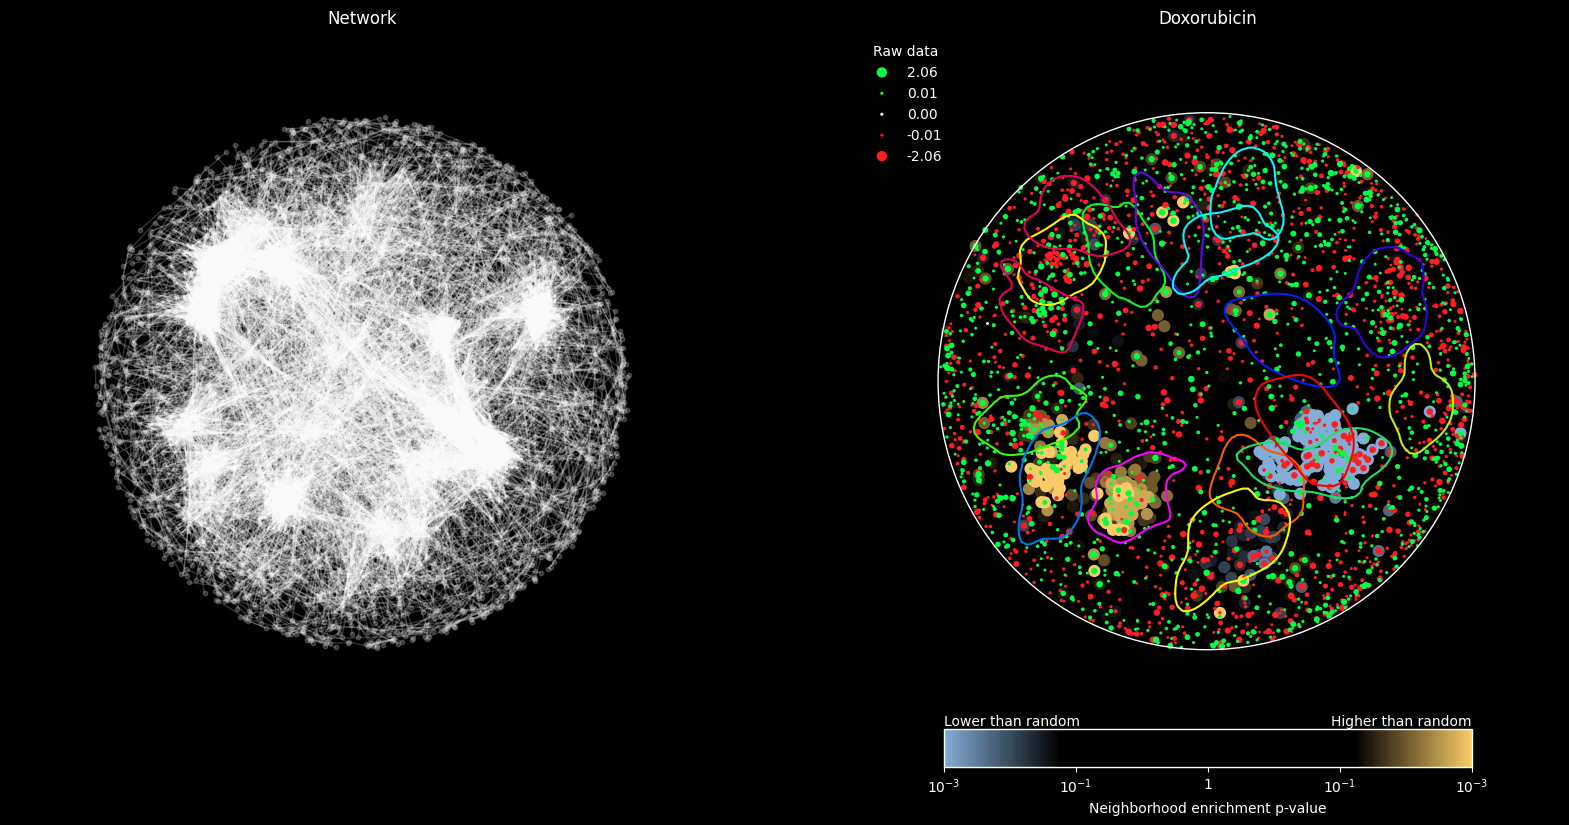

In [15]:
# Map the raw data onto the network
sf.plot_sample_attributes(show_costanzo2016=True, show_raw_data=True)

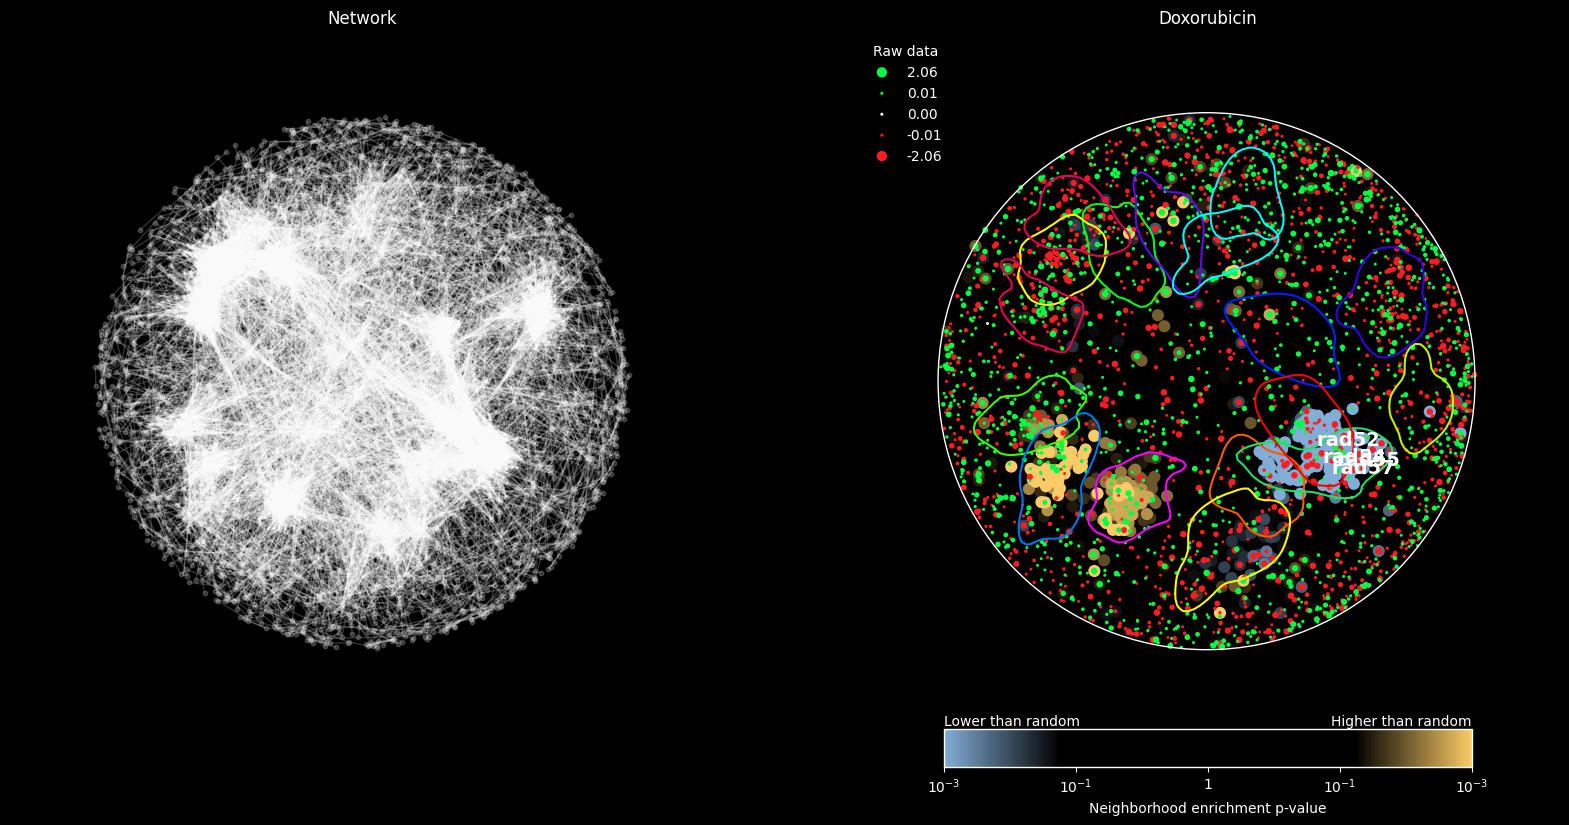

In [16]:
# Map a few labels onto the network
sf.plot_sample_attributes(show_costanzo2016=True, show_raw_data=True, labels=['rad54','rad57','rad55','rad52'])

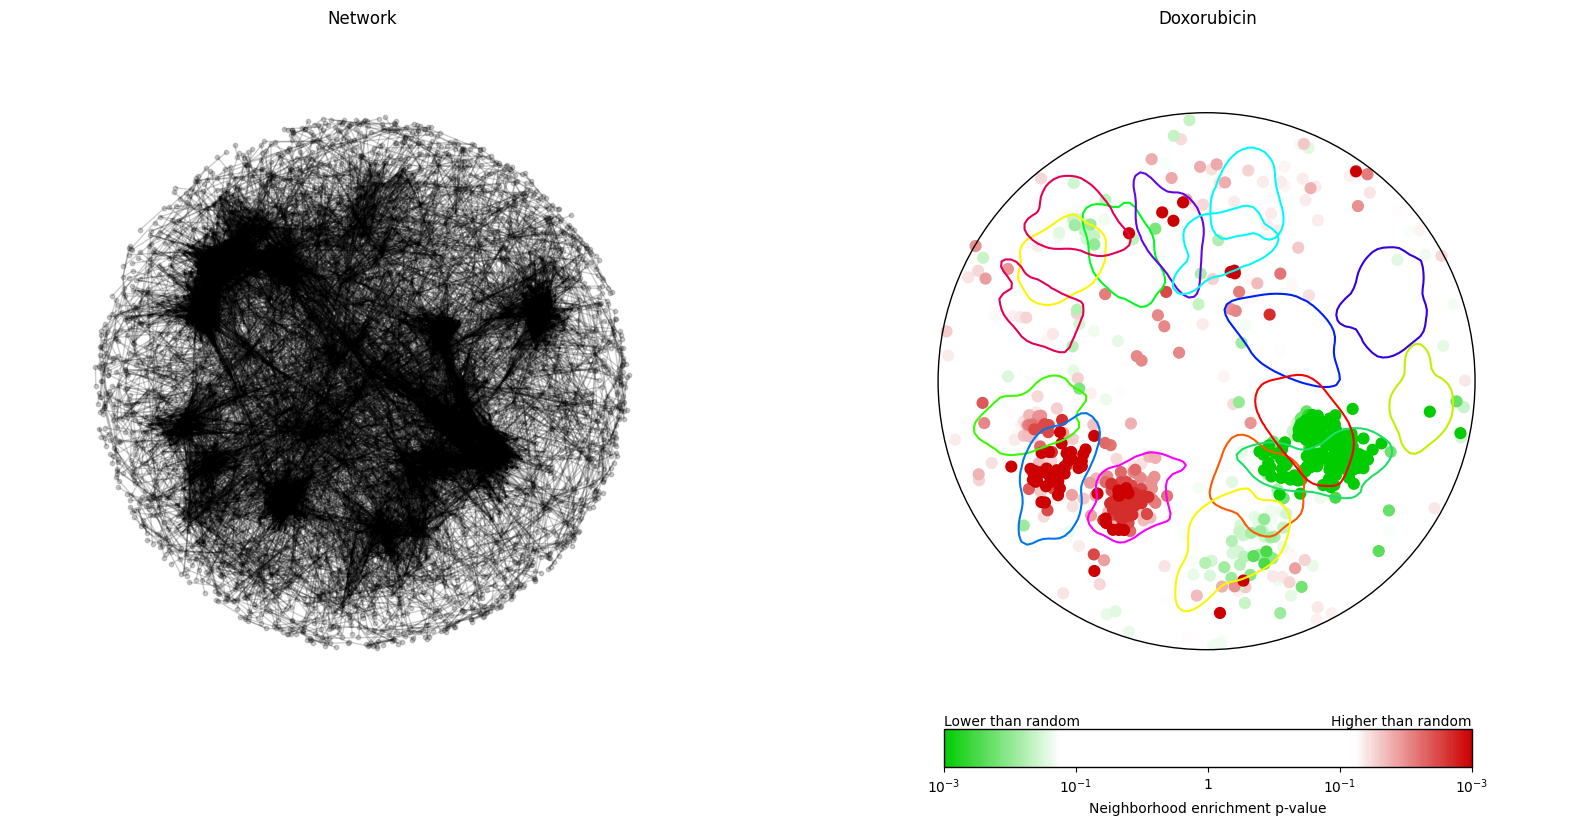

In [17]:
# Change the background color and the enrichment colors
sf.plot_sample_attributes(show_costanzo2016=True, background_color='#ffffff', colors=['00cc00','cc0000'])

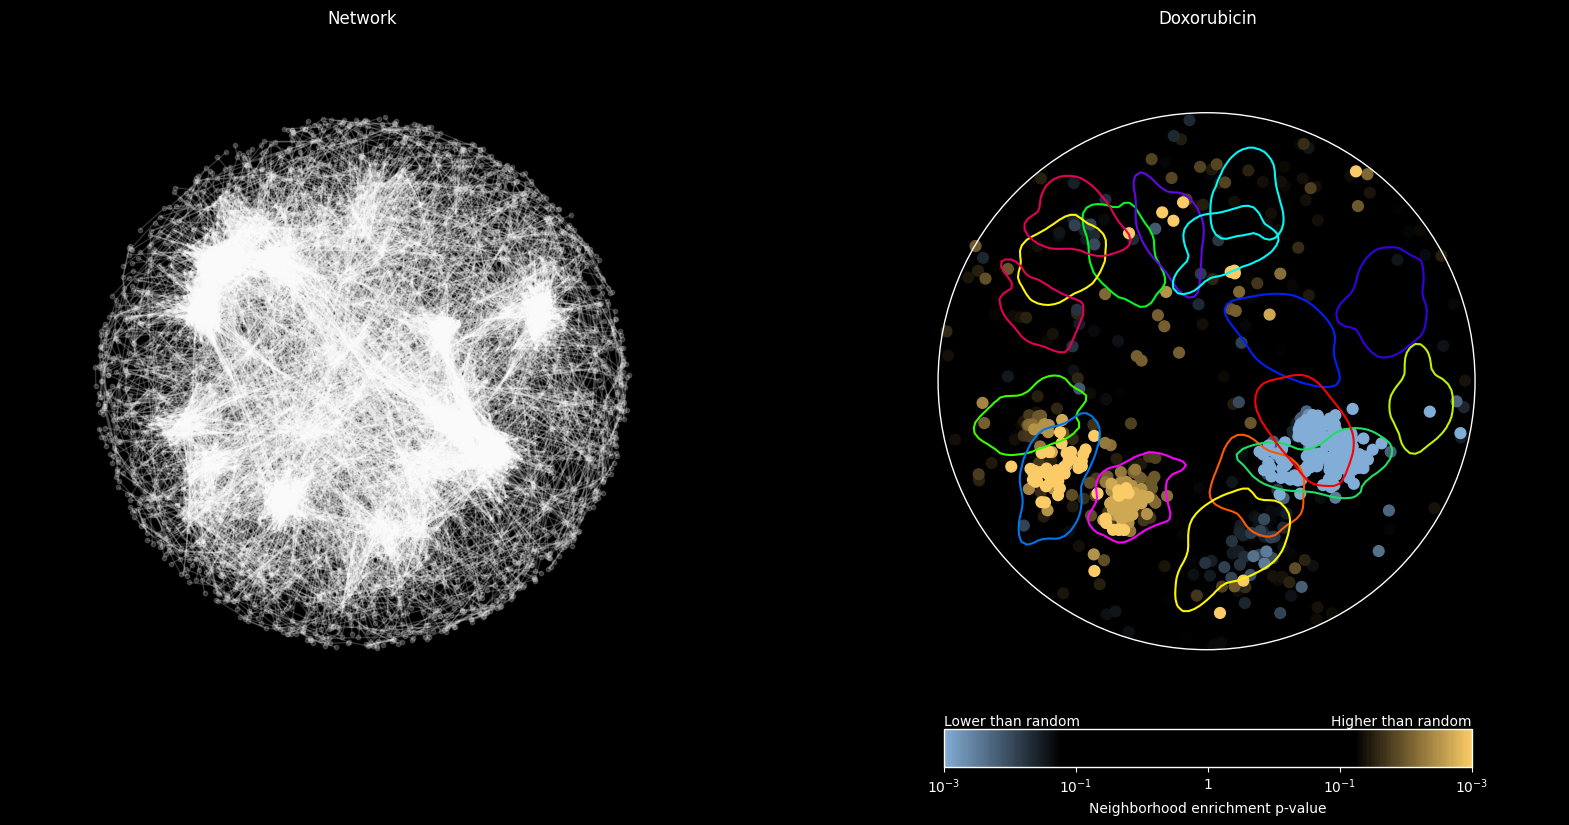

In [18]:
# Show the figure and save it to a PDF file
sf.plot_sample_attributes(show_costanzo2016=True, save_fig='./doxorubicin.pdf')

In [19]:
# Print output files into the current directory
sf.print_output_files(output_dir='./')